#**Caso práctico de regresión logística: Covid-19**

##**Descripción del problema**
#####Construir un modelo de aprendizaje automático que, dadas las características del paciente, prediga si un paciente de COVID-19 se encuentra o no en una categoría de alto riesgo.

##**Descrición del set de datos**
#####Se utilizó un archivos csv de 1048575 filas (pacientes) y 21 columnas (características), que contiene los datos de pacientes de COVID-19 con las siguientes características:


*   USMER: Indica si el paciente está siendo tratado en una unidad médica de 1, 2 o 3 nivel.
*   MEDICAL_UNIT: Unidad médica asignada.
*   SEX: Género del paciente; 1 para femenino, 2 para masculino.
*   PATIENT_TYPE: Tipo de paciente; 1 para ambulatorio, 2 para hospitalizado.
*   DATE_DIED: Fecha de fallecimiento (si aplica); si el paciente falleció indica la fecha, de lo contrario aparece 9999-99-99.
*   INTUBED: Si el paciente fue intubado.
*   PNEUMONIA: Presencia de neumonía.
*   AGE: Edad del paciente.
*   PREGNANT: Estado de embarazo.
*   DIABETES: Presencia de diabetes.
*   COPD: Enfermedad pulmonar obstructiva crónica.
*   ASTHMA: Presencia de asma.
*   INMSUPR: Inmunosupresión.
*   HIPERTENSION: Presencia de hipertensión.
*   OTHER_DISEASE: Otras enfermedades.
*   CARDIOVASCULAR: Enfermedades cardiovasculares.
*   OBESITY: Obesidad.
*   RENAL_CHRONIC: Enfermedad renal crónica.
*   TOBACCO: Uso de tabaco.
*   CLASIFFICATION_FINAL: 1-3 el paciente fue diagnosticado con COVID en diferentes grados, 4 significa negativo o inconcluso.
*   ICU: Si el paciente fue admitido en la UCI.




###**Carga de librerías**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score

###**Obtención y preparación de los datos**
#####Usar un conjunto de datos que contengan las caracteristicas de pacientes de COVID-19.

In [4]:
CovidData = pd.read_csv('/content/Covid_Data.csv')
print(CovidData.shape)
CovidData.head()

(305387, 21)


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97.0,1.0,65.0,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,97.0
1,2,1,2,1,03/06/2020,97.0,1.0,72.0,97.0,2.0,...,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5.0,97.0
2,2,1,2,2,09/06/2020,1.0,2.0,55.0,97.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
3,2,1,1,1,12/06/2020,97.0,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0
4,2,1,2,1,21/06/2020,97.0,2.0,68.0,97.0,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,97.0


In [5]:
CovidData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305387 entries, 0 to 305386
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   USMER                 305387 non-null  int64  
 1   MEDICAL_UNIT          305387 non-null  int64  
 2   SEX                   305387 non-null  int64  
 3   PATIENT_TYPE          305387 non-null  int64  
 4   DATE_DIED             305387 non-null  object 
 5   INTUBED               305386 non-null  float64
 6   PNEUMONIA             305386 non-null  float64
 7   AGE                   305386 non-null  float64
 8   PREGNANT              305386 non-null  float64
 9   DIABETES              305386 non-null  float64
 10  COPD                  305386 non-null  float64
 11  ASTHMA                305386 non-null  float64
 12  INMSUPR               305386 non-null  float64
 13  HIPERTENSION          305386 non-null  float64
 14  OTHER_DISEASE         305386 non-null  float64
 15  

In [6]:
CovidData.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,305387.000000,305387.000000,305387.000000,305387.000000,305386.000000,305386.000000,305386.000000,305386.000000,305386.000000,305386.000000,305386.000000,305386.000000,305386.000000,305386.000000,305386.000000,305386.000000,305386.000000,305386.000000,305386.000000,305386.000000
mean,1.546143,3.934621,1.499298,1.295337,69.777472,4.137577,43.284754,49.488215,1.945073,2.072164,2.059734,2.075603,1.887084,2.044491,2.071054,1.898096,2.064882,2.022431,4.966413,69.832160
std,0.497867,0.255301,0.500000,0.456195,43.041684,14.814474,17.137453,47.508265,3.017984,2.970940,3.003916,2.995830,2.892002,3.071929,3.011925,2.438465,2.997870,3.090592,1.820890,42.958795
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,1.000000,1.000000,2.000000,2.000000,31.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000
50%,2.000000,4.000000,1.000000,1.000000,97.000000,2.000000,41.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,6.000000,97.000000
75%,2.000000,4.000000,2.000000,2.000000,97.000000,2.000000,54.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,7.000000,97.000000
max,2.000000,4.000000,2.000000,2.000000,99.000000,99.000000,109.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,7.000000,99.000000


In [7]:
cols_cat = ['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED', 'PNEUMONIA', 'AGE',
            'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE',
             'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'CLASIFFICATION_FINAL', 'ICU']
for col in cols_cat:
  print(f'Columna {col}:{CovidData[col].nunique()} subniveles')

Columna USMER:2 subniveles
Columna MEDICAL_UNIT:4 subniveles
Columna SEX:2 subniveles
Columna PATIENT_TYPE:2 subniveles
Columna DATE_DIED:338 subniveles
Columna INTUBED:4 subniveles
Columna PNEUMONIA:3 subniveles
Columna AGE:106 subniveles
Columna PREGNANT:4 subniveles
Columna DIABETES:3 subniveles
Columna COPD:3 subniveles
Columna ASTHMA:3 subniveles
Columna INMSUPR:3 subniveles
Columna HIPERTENSION:3 subniveles
Columna OTHER_DISEASE:3 subniveles
Columna CARDIOVASCULAR:3 subniveles
Columna OBESITY:3 subniveles
Columna RENAL_CHRONIC:3 subniveles
Columna CLASIFFICATION_FINAL:7 subniveles
Columna ICU:4 subniveles


####**Preprocesamiento**
#####Preprocesar los datos asegurándose de tratar los valores nulos o atípicos y normalizar las características si es necesario.

######Conversión de valores booleanos a 0 y 1.

In [8]:
bool_cols = ['SEX', 'PATIENT_TYPE', 'PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
             'HIPERTENSION', 'CARDIOVASCULAR', 'OTHER_DISEASE', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO',
             'INTUBED', 'ICU']
for col in bool_cols:
    CovidData[col] = CovidData[col].replace({1: 1, 2: 0, 97: np.nan, 99: np.nan, 98: np.nan})


######Conversion de columnas con varios valores a booleanos

In [9]:
##Convertir la clasificación del paciente a 1 si su test de COVID fue positivo (valores 1-3)y 0 si fue negativo
##(valores iguales o mayores a 4)
CovidData['CLASIFFICATION_FINAL'] = CovidData['CLASIFFICATION_FINAL'].replace({1:1, 2:1, 3:1, 4:0, 5:0, 6:0, 7:0, 97: np.nan, 99: np.nan, 98: np.nan})
##Si el paciente fue enviado a una unidad de segundo o tercer nivel es más problable que haya sido un caso grave
##1 para unidades de primer nivel y 2 para unidades de segundo o tercer nivel
CovidData['USMER'] = CovidData['USMER'].replace({1:0, 2:1,3:1, 97: np.nan, 99: np.nan, 98: np.nan})

In [10]:
##Si el paciente falleció 1 y 0 si no falleció.
CovidData['DATE_DIED'] = CovidData['DATE_DIED'].apply(lambda x: 0 if x == '9999-99-99' else 1)

In [11]:
##Si el paciente se encuentra en edad de riesgo; 1 = se encuentra en edad de riesgo, 0 = no se encuentra en edad de riesgo
umbral_edad = 65
CovidData['AGE'] = (CovidData['AGE'] > umbral_edad).astype(int)
print(CovidData)

        USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE  DATE_DIED  INTUBED  PNEUMONIA  \
0           1             1    1             1          1      NaN        1.0   
1           1             1    0             1          1      NaN        1.0   
2           1             1    0             0          1      1.0        0.0   
3           1             1    1             1          1      NaN        0.0   
4           1             1    0             1          1      NaN        0.0   
...       ...           ...  ...           ...        ...      ...        ...   
305382      0             4    0             0          0      1.0        0.0   
305383      0             4    0             1          0      NaN        0.0   
305384      0             4    1             0          0      0.0        0.0   
305385      1             4    1             1          0      NaN        0.0   
305386      0             4    1             0          1      NaN        NaN   

        AGE  PREGNANT  DIAB

#####Valores nulos

In [12]:
print(CovidData.isnull().sum)

<bound method DataFrame.sum of         USMER  MEDICAL_UNIT    SEX  PATIENT_TYPE  DATE_DIED  INTUBED  \
0       False         False  False         False      False     True   
1       False         False  False         False      False     True   
2       False         False  False         False      False    False   
3       False         False  False         False      False     True   
4       False         False  False         False      False     True   
...       ...           ...    ...           ...        ...      ...   
305382  False         False  False         False      False    False   
305383  False         False  False         False      False     True   
305384  False         False  False         False      False    False   
305385  False         False  False         False      False     True   
305386  False         False  False         False      False     True   

        PNEUMONIA    AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  \
0           False  False     False

In [13]:
##Eliminación de filas con valores nulos
CovidData = CovidData.dropna()

In [14]:
print(f"Filas restantes después de eliminar NaN: {CovidData.shape[0]}")

Filas restantes después de eliminar NaN: 35692


###**Análisis exploratorio de los datos**
#####Identificar relaciones entre las caracteristicas y la variable objetivo (si el paciente es de alto riesgo o no).
#####Generar gráficos que muestren las variables más importantes.

#####Eliminar las columnas con la información menos relevante

In [15]:
CovidData.drop(columns=['TOBACCO', 'PREGNANT', 'ASTHMA', 'OTHER_DISEASE'], inplace=True)
CovidData.columns

<ipython-input-15-9fec07ffbebf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CovidData.drop(columns=['TOBACCO', 'PREGNANT', 'ASTHMA', 'OTHER_DISEASE'], inplace=True)


Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'DIABETES', 'COPD', 'INMSUPR', 'HIPERTENSION',
       'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'CLASIFFICATION_FINAL',
       'ICU'],
      dtype='object')

In [16]:
CovidData.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,DIABETES,COPD,INMSUPR,HIPERTENSION,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,CLASIFFICATION_FINAL,ICU
count,35692.000000,35692.000000,35692.0,35692.0,35692.000000,35692.000000,35692.000000,35692.000000,35692.000000,35692.000000,35692.000000,35692.000000,35692.000000,35692.000000,35692.000000,35692.000000,35692.000000
mean,0.438390,3.951810,1.0,0.0,0.384260,0.185196,0.483442,0.315533,0.340244,0.050067,0.043819,0.410344,0.051944,0.219797,0.077132,0.578281,0.027625
std,0.496197,0.220488,0.0,0.0,0.486427,0.388462,0.499733,0.464734,0.473798,0.218087,0.204696,0.491903,0.221918,0.414115,0.266805,0.493841,0.163899
min,0.000000,1.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,4.000000,1.0,0.0,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,4.000000,1.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
CovidData.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,DIABETES,COPD,INMSUPR,HIPERTENSION,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,CLASIFFICATION_FINAL,ICU
5,1,1,1,0,0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,1,1,1,0,0,0.0,0.0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9,1,1,1,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16,1,1,1,0,0,0.0,1.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
56,1,1,1,0,0,1.0,1.0,0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0


###**Gráficas**
#####Graficas de variables importantes.



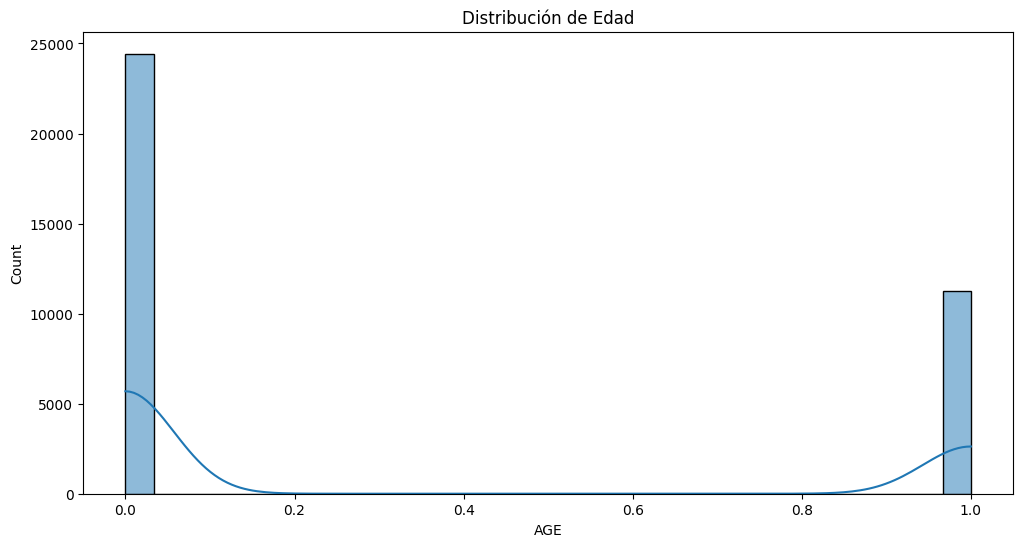

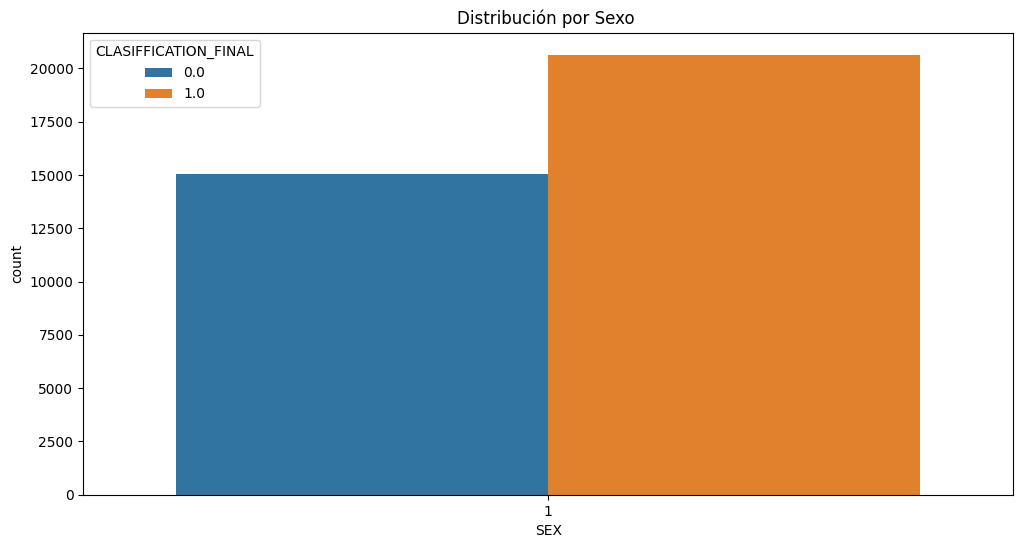

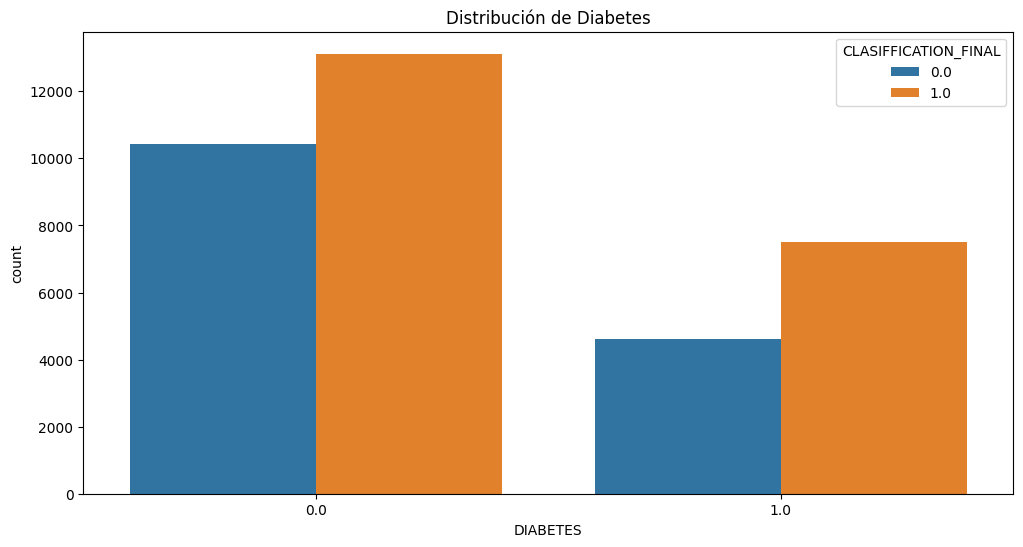

In [20]:
# Generar gráficos de variables importantes (edades de riesgo, distribución por sexo, diabetes)
plt.figure(figsize=(12, 6))
sns.histplot(CovidData['AGE'], bins=30, kde=True)
plt.title('Distribución de Edad')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='SEX', hue='CLASIFFICATION_FINAL', data=CovidData)
plt.title('Distribución por Sexo ')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='DIABETES', hue='CLASIFFICATION_FINAL', data=CovidData)
plt.title('Distribución de Diabetes')
plt.show()

#####Implementar un modelo de regresión logística que utilice las características seleccionadas para predecir si el paciente es de alto riesgo.

In [25]:
# Preparar los datos
X = CovidData[['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'AGE', 'DIABETES', 'COPD', 'INMSUPR', 'HIPERTENSION', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC']]
y = CovidData['CLASIFFICATION_FINAL']

In [29]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [31]:
# Crear el modelo de regresión logística
logreg = LogisticRegression()

In [32]:
# Entrenar el modelo
logreg.fit(X_train, y_train)

LogisticRegression()

In [33]:
# Hacer predicciones
y_pred = logreg.predict(X_test)

###**Evaluación del modelo**
#####Dividir los datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo.
#####Usar métricas como la precisión, sensibilidad, especificidad y el AUC (Área bajo la curva ROC) para medir su rendimiento.

In [35]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6134665670526709


In [37]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[1783 2730]
 [1409 4786]]


In [38]:
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.56      0.40      0.46      4513
         1.0       0.64      0.77      0.70      6195

    accuracy                           0.61     10708
   macro avg       0.60      0.58      0.58     10708
weighted avg       0.60      0.61      0.60     10708



###**Justificación del impacto de las características.**


######**Edad**
######Las personas mayores de 65 años y menores de 6 meses tienen un riesgo más alto que el promedio de presentar un cuadro grave de COVID-19. Esto debido a que con la edad el sistema inmunitario disminuye su capacidad, además aumenta la probabilidad de enfermedades que aumentan el riesgo de un cuadro grave de COVID-19 (diabetes, enfermedades cardiacas, obesidad, etc.). [1]
######**Género del paciente**
######En un informe publicado por la Organización Panamericana de la Salud, se declara que que los hombres podrían tener un mayor riesgo de sufrir una infección grave por el SARS-CoV-2, debido a que el número de hombres hospitalizados es superior en 50% al de mujeres. [4]
######**Hipertensión, obesidad, diabetes y tabaquismo**
######Están enlistadas como comorbilidades principales en el portal de informacion general acerca del COVID-19 en México. [2]
######**Afecciones pulmonares: EPOC, Asma.**
######El riesgo de presentar un cuadro grave de COVID-19 aumenta en pacientes que tienen enfermedades que dañan el tejido pulmonar como el EPOC. El el caso del asma el riesgo aumenta si se padece de forma moderada a grave.[2]
######**Neumonía**
######Un paciente que presenta neumonía por COVID-19 puede desencadenar cuadros que requerirán de asistencia respiratoria (intubación). [3]
######**Deceso**
######Si el paciente falleció por la enfermedad es evidente que estuvo en un estado grave.
######**Embarazo**
######Es un factor de riesgo y puede conllevar complicaciones para la madre derivadas de la infección por COVID-19 en comparación con mujeres no embarazadas en las mismas condiciones.
######**Inmunosupresión**
######Un sistema inmunológico debilitado es una clara señal de alerta para un paciente con COVID-19.
######**Enfermedad renal crónica**
######Es un factor de riesgo para un paciente con COVID-19.
######**Paciente intubado**
######Cuando un paciente de COVID-19 es intubado es un hecho que ya se encuentra una etapa grave de la enfermedad. Además las tasas de mortalidad en este tipo de pacientes es bastante alta.
######**Paciente en la Unidad de Cuidados Intensivos**
######Si un paciente de COVID requiere de cuidados intensivos, es evidente que se encuentra grave.
######**Paciente ambulatorio u hospitalizado**
######Si un paciente requiere de hospitalización su estado puede ser grave.
######**Otras enfermedades**
######Hay más enfermedades que pueden considerarse factores de riesgo para pacientes con COVID-19, aunque en este caso no se especifican.
######**Nivel de atención que requirió el paciente.**
######Se podría decir que un paciente que requirió de un segundo o tercer nivel de atención médica es más probable de estar en un estado grave que alguien que solo acudió al primer nivel de atención. Sin embargo debido a las condiciones de la pandemia de COVID-19 es difícil determinar con exactitud.
######**Clasificación del test de COVID-19**
######Nos indica si el paciente tuvo COVID según la prueba aunque es algo inexacta debido a los resultados inconclusos que se presentan.


###**Variables más útiles para predecir si un paciente está en alto riesgo.**
######Con base en la información acerca de como influye cada una de las características que contempla el conjunto de datos en el estado de un paciente con COVID-19, se determinó que las variables más útiles para el modelo de predicción serían:
*   DATE_DIED.
*   INTUBED.
*   ICU
*   NEUMONIA.
*   PATIENT_TYPE.
*   USMER.
*   CLASIFFICATION_FINAL.
*   MEDICAL_UNIT.
*   AGE.
*   SEX.
*   COPD.
*   CARDIOVASCULAR.
*   OBESITY.
*   HIPERTENSION.
*   DIABETES.
*   RENAL_CRHONIC.
*   INMSUPR.



###**Variables menos útiles**
######Asimismo, podria decirse que las variables menos útiles para determinar si un paciente de COVID-19 se encuentra grave son:
*   TOBACO.
*   PREGNANT.
*   ASTHMA.
*   OTHER_DISEASE.

###**Información consultada**


*   [1]COVID-19: ¿quién está a un mayor riesgo para los síntomas de gravedad? (2024, 20 agosto). Mayo Clinic. https://www.mayoclinic.org/es/diseases-conditions/coronavirus/in-depth/coronavirus-who-is-at-risk/art-20483301
*   [2]COVID-19 Tablero México. (s. f.). COVID - 19 Tablero México. https://datos.covid-19.conacyt.mx/
*   [3]Caeme. (2024, 4 marzo). Qué es la neumonía bilateral: el riesgo más temido del COVID-19 » CAEME. CAEME. https://www.caeme.org.ar/que-es-la-neumonia-bilateral-el-riesgo-mas-temido-del-covid-19/
*   [4]https://www.paho.org/es/file/83100/download?token=py3eVKGe

